In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/refs/heads/master/Social_Network_Ads.csv')

In [3]:
df = df[['Age', 'EstimatedSalary', 'Purchased']]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [6]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train.shape

(320, 2)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

## Training Time Check

In [18]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
start = time.time()

# Batch Gradient Descent with 10 epochs

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=320)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7156 - loss: 0.5877
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.7375 - loss: 0.5805
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7531 - loss: 0.5755
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.7563 - loss: 0.5714
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.7719 - loss: 0.5677
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7781 - loss: 0.5645
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7844 - loss: 0.5614
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7844 - loss: 0.5586
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7875 - loss: 0.5560
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7906 - loss: 0.5534
3.0522522926330566


In [20]:
# Stochastic Gradient Descent with 10 epochs

history2 = model.fit(X_train_scaled, y_train, epochs=10, batch_size=1)
print(time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8004 - loss: 0.5055
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8210 - loss: 0.3587
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7864 - loss: 0.3866
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8111 - loss: 0.3490
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8726 - loss: 0.3184
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8811 - loss: 0.2735
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8980 - loss: 0.2773
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9013 - loss: 0.2265
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8943 - loss: 0.3169
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9307 - loss: 0.2204
179.2888889312744


## Convergence Time Check

In [22]:
history3 = model.fit(X_train_scaled, y_train, epochs=10, batch_size=320, validation_split=0.2)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.9023 - loss: 0.2712 - val_accuracy: 0.9062 - val_loss: 0.2176
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9023 - loss: 0.2712 - val_accuracy: 0.9062 - val_loss: 0.2175
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.9062 - loss: 0.2711 - val_accuracy: 0.9062 - val_loss: 0.2174
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9062 - loss: 0.2710 - val_accuracy: 0.9062 - val_loss: 0.2173
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9062 - loss: 0.2709 - val_accuracy: 0.9062 - val_loss: 0.2172
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9062 - loss: 0.2708 - val_accuracy: 0.9062 - val_loss: 0.2171
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.9062 - loss: 0.2707 - val_accuracy: 0.9062 - val_loss: 0.2170
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9062 - loss: 0.2706 - val_accuracy: 0.9062 - val_loss: 0.

In [25]:
history4 = model.fit(X_train_scaled, y_train, epochs=10, batch_size=1, validation_split=0.2)


Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8455 - loss: 0.3735 - val_accuracy: 0.9219 - val_loss: 0.2212
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9370 - loss: 0.2081 - val_accuracy: 0.9219 - val_loss: 0.2297
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9198 - loss: 0.2562 - val_accuracy: 0.9219 - val_loss: 0.2262
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9255 - loss: 0.2519 - val_accuracy: 0.9219 - val_loss: 0.2206
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9228 - loss: 0.2222 - val_accuracy: 0.9219 - val_loss: 0.2254
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9195 - loss: 0.2733 - val_accuracy: 0.9219 - val_loss: 0.2368
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8847 - loss: 0.2729 - val_accuracy: 0.9219 - val_loss: 0.2331
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9322 - loss: 0.2492 - val_accuracy: 0.

## Stability Check

In [26]:
history5 = model.fit(X_train_scaled, y_train, epochs=500, batch_size=320, validation_split=0.2)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9062 - loss: 0.2722 - val_accuracy: 0.9219 - val_loss: 0.2190
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9062 - loss: 0.2721 - val_accuracy: 0.9219 - val_loss: 0.2190
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.9062 - loss: 0.2719 - val_accuracy: 0.9219 - val_loss: 0.2189
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9062 - loss: 0.2718 - val_accuracy: 0.9219 - val_loss: 0.2189
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9062 - loss: 0.2716 - val_accuracy: 0.9219 - val_loss: 0.2188
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.9062 - loss: 0.2714 - val_accuracy: 0.9219 - val_loss: 0.2187
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.9062 - loss: 0.2713 - val_accuracy: 0.9219 - val_loss: 0.2187
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.9062 - loss: 0.2711 - val_accuracy: 0.9219 - v

In [27]:
history6 = model.fit(X_train_scaled, y_train, epochs=500, batch_size=1, validation_split=0.2)


Epoch 1/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9332 - loss: 0.1843 - val_accuracy: 0.9062 - val_loss: 0.2173
Epoch 2/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9278 - loss: 0.2159 - val_accuracy: 0.9062 - val_loss: 0.2279
Epoch 3/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9516 - loss: 0.1900 - val_accuracy: 0.9062 - val_loss: 0.2281
Epoch 4/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9371 - loss: 0.2030 - val_accuracy: 0.9062 - val_loss: 0.2366
Epoch 5/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.1908 - val_accuracy: 0.9062 - val_loss: 0.2389
Epoch 6/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.2732 - val_accuracy: 0.9062 - val_loss: 0.2528
Epoch 7/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9284 - loss: 0.2254 - val_accuracy: 0.9062 - val_loss: 0.2469
Epoch 8/500
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9562 - loss: 0.1759 - val_accu

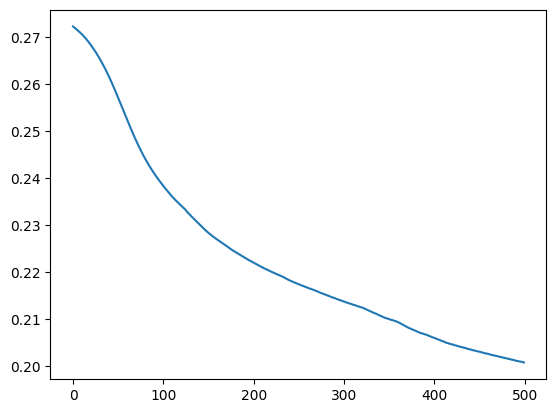

In [32]:
import matplotlib.pyplot as plt

plt.plot(history5.history['loss'])

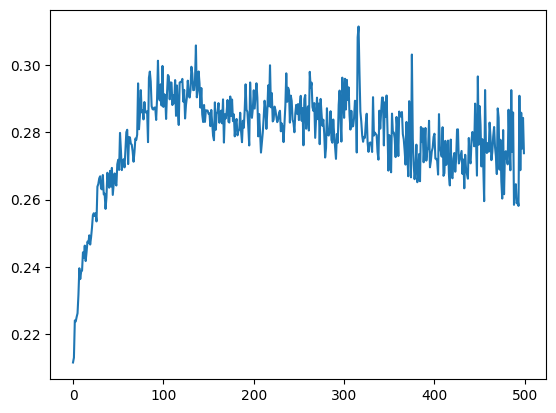

In [33]:
plt.plot(history6.history['loss'])